In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

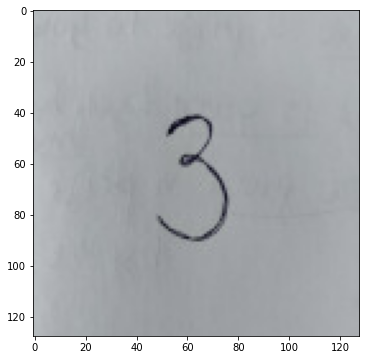

In [11]:
my_img = cv2.imread('3.jpeg')
plt.figure(figsize=(10, 6))
plt.imshow(my_img, cmap='gray')

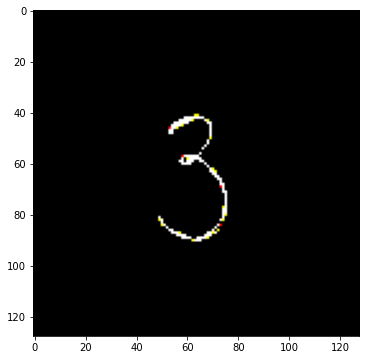

In [12]:
retval, dst = cv2.threshold(my_img, 100, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10, 6))
plt.imshow(dst, cmap='gray')

In [19]:
def my_model():
    input_size = 784
    hidden_sizes = [128, 64]
    output_size = 10

    model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[1], output_size),
                          nn.LogSoftmax(dim=1))
    return model

In [20]:
def img_preprocessing(image):
    img = cv2.imread(image)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    ret, dst = cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((2,2),np.uint8)
    dst = cv2.dilate(dst, kernel)
    re_rgb = cv2.resize(img_rgb, (28, 28))
    re_dst = cv2.resize(dst, (28, 28))
    return re_rgb, re_dst

In [21]:
def view_classify(img1, img2, ps):
    ps = F.softmax(ps,dim=1)
    ps = ps.data.detach().numpy().squeeze()
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 10), ncols=3)
    ax1.imshow(img1)
    ax1.set_title('Original Image')
    ax2.imshow(img2, cmap='gray')
    ax2.set_title('Binary Image')
    ax3.barh(np.arange(10), ps)
    ax3.set_aspect(0.1)
    ax3.set_yticks(np.arange(10))
    ax3.set_title('Probability')
    ax3.set_xlim(0, 1)

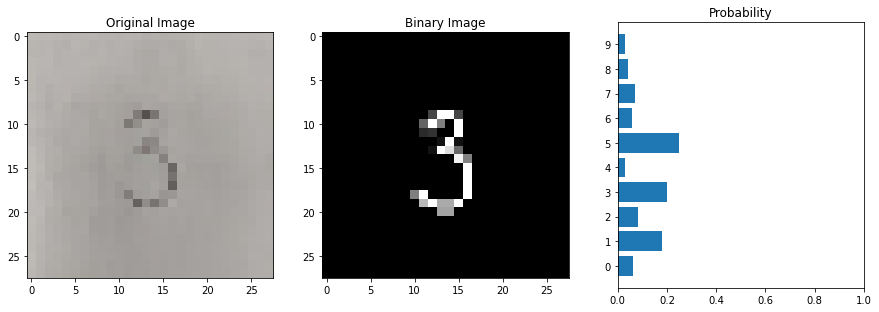

In [22]:
image_path = '3_bis.jpeg'
image = cv2.imread(image_path)

model_path = 'digits-model.pth'
model = my_model()

model.load_state_dict(torch.load(model_path))

re_rgb, re_dst = img_preprocessing(image_path)

set_tensor = transforms.Compose([transforms.ToTensor()])
img_tensor = set_tensor(re_dst)

img = img_tensor.view(img_tensor.shape[0], -1)

# Prediction
prediction = model(img)
label = prediction.argmax(dim=1).item()

view_classify(re_rgb, re_dst, prediction)

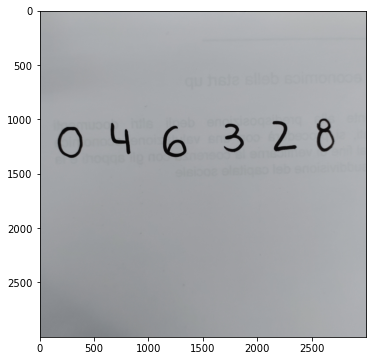

In [9]:
my_img = cv2.imread('numbers.jpg')
plt.figure(figsize=(10, 6))
plt.imshow(my_img, cmap='gray')

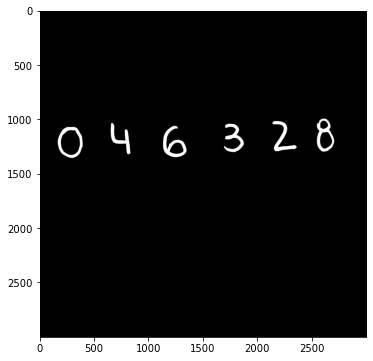

In [10]:
retval, dst = cv2.threshold(my_img, 100, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10, 6))
plt.imshow(dst, cmap='gray')